In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
df = pd.read_csv('time_series.csv')

# Преобразуем даты в datetime объекты
dates = pd.to_datetime(df['date']).values

# Значения временного ряда
values = df['value'].values.reshape(-1, 1)

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

In [ ]:
Формирование обучающих последовательностей

In [4]:
def create_dataset(data, look_back=30):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

look_back = 30
X, y = create_dataset(scaled_values, look_back)

# Разделение на тренировочные и тестовые данные (80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
Создание модели LSTM

In [5]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=0)

E:\Python_LabsAndProjekt\ML\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
Прогноз на тестовом наборе

In [6]:
y_pred = model.predict(X_test)

# Обратное масштабирование для визуализации
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


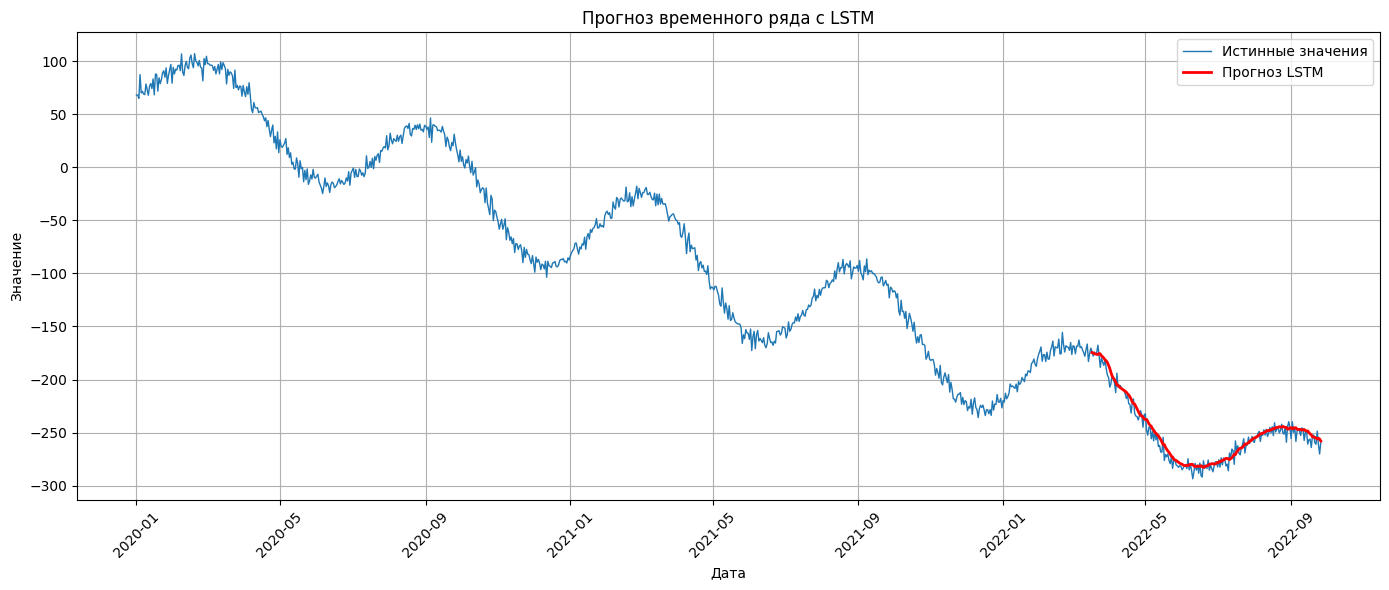

In [26]:
plt.figure(figsize=(14,6))

# Весь истинный ряд
plt.plot(dates, values, label='Истинные значения', linewidth=1)

# Прогноз LSTM на тестовой части
plt.plot(dates[-len(y_pred_inv):], y_pred_inv, label='Прогноз LSTM', color='red', linewidth=2)

plt.title('Прогноз временного ряда с LSTM')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Предсказание и анализ метрик

In [18]:
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE:{mape:.4f}")

MAE: 4.8629, RMSE: 6.1954, MAPE:0.0196


Так как MAE и RMSE невелики, а MAPE показывает очень малое отклонение прогнозов, можно сделать вывод, что у нас высокая очность модели.

Прогноз на будующие

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

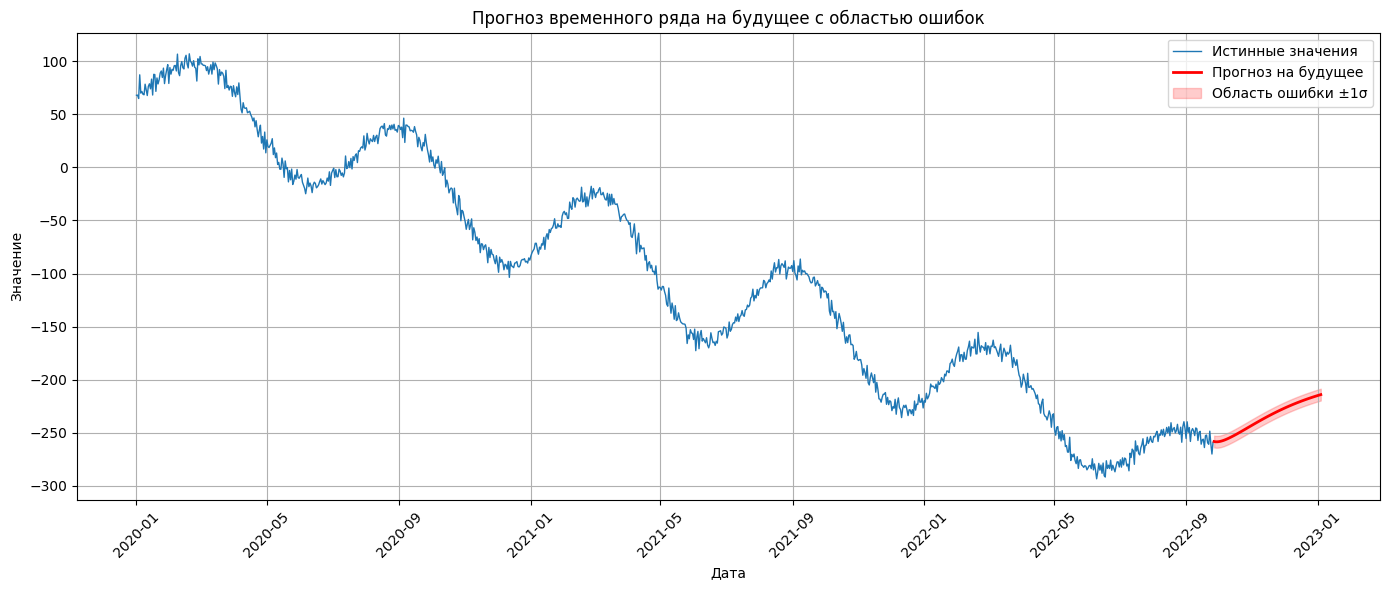

In [29]:
future_steps = 100
future_input = scaled_values[-look_back:].reshape(1, look_back, 1)
future_preds = []

for _ in range(future_steps):
    pred = model.predict(future_input)[0][0]
    future_preds.append(pred)
    future_input = np.append(future_input[:,1:,:], [[[pred]]], axis=1)

future_preds_inv = scaler.inverse_transform(np.array(future_preds).reshape(-1,1))
last_date = pd.to_datetime(df['date'].iloc[-1])
future_dates = [last_date + timedelta(days=i+1) for i in range(future_steps)]

# Стандартное отклонение ошибок на тестовой выборке
y_test_scaled = scaler.transform(df['value'].values[-len(X_test):].reshape(-1,1))
y_test_pred_scaled = model.predict(X_test)
y_test_pred_inv = scaler.inverse_transform(y_test_pred_scaled)
errors = y_test_pred_inv.flatten() - df['value'].values[-len(X_test):]
sigma = np.std(errors)

# Верхняя и нижняя границы для прогноза будущего
upper_bound = future_preds_inv.flatten() + sigma
lower_bound = future_preds_inv.flatten() - sigma

plt.figure(figsize=(14,6))
plt.plot(dates, values, label='Истинные значения', linewidth=1)
plt.plot(future_dates, future_preds_inv, label='Прогноз на будущее', color='red', linewidth=2)
plt.fill_between(future_dates, lower_bound, upper_bound, color='red', alpha=0.2, label='Область ошибки ±1σ')
plt.title('Прогноз временного ряда на будущее с областью ошибок')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

SARIMA лучше воспроизводит сезонность и тренд, а её доверительный интервал адекватнее оценивает неопределённость прогноза. Прогноз LSTM получился излишне сглаженным с неоправданно узкой областью ошибок, что указывает на недостаточную адаптацию модели к сезонным колебаниям ряда.